In [1]:
import sys
import os
if os.path.abspath('../sample') not in sys.path:
    sys.path.insert(0, os.path.abspath('../sample'))
if os.path.abspath('../model') not in sys.path:
    sys.path.insert(0, os.path.abspath('../model'))
    
from current_plot import *
import data_manipulation as dm
import autosimilarity_segmentation as as_seg
import tensor_factory as tf
import pandas as pd
import features
import numpy as np
import soundfile as sf
import NTD
import hide_code as hide
import overall_scripts as scr

This study is divided in 3 Notebooks, all starting with a 5.

These 3 notebooks aim at studying 3 different kernels for the convolution measure.

They should be read in their logical order.

Note, as a prerequisite, that the diagonal of all our kernels is zero. Indeed, we consider that the diagonal of autosimilarity matrices doesn't hold structural information, and that considering it is counter-productive.

More details about the design of these notebooks can be found in the Notebook "Appendix - Focus on the segmentation algorithm".

# Full kernel

This kernel is a kernel only composed of 0 and 1. It is equal to 0 on the diagonal, and to 1 elsewhere.

It looks like: <img src="imgs/full_kernel.png" width="150"/>

(or, in a matrix form: $\left[ \begin{matrix} 0 & 1 & 1 & 1& 1 & 1 & 1 & 1\\  1 & 0 & 1 & 1& 1 & 1 & 1 & 1\\  1 & 1 & 0 & 1& 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 0 & 1 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 & 0 & 1 & 1 & 1\\ 1 & 1 & 1 & 1 & 1 & 0 & 1 & 1\\ 1 & 1 & 1& 1 & 1 & 1 & 0 & 1\\ 1 & 1 & 1& 1 & 1 & 1 & 1 & 0\\ \end{matrix} \right]$ (of size 8 here)).

Mathematically, for a segment ($b_1, b_2$), the associated cost will be $c_{b_1,b_2} = \frac{1}{b_2 - b_1 + 1}\sum_{i,j = 0, i \ne j}^{n - 1}  a_{i + b_1, j + b_1}$.

By construction, this kernel catches the similarity everywhere around the diagonal. As high similarity means higher values (and dark zones) in our autosimilarities, the higher this kernel, the more similar is the zone we are studying.

(You should read the "Appendix - Focus on the segmentation algorithm" notebook if you don't understand well how our algorithm work, and why the kernel is important).

## Fixed ranks

Below are segmentation results with different ranks values, but each time fixed over the entire RWC Pop dataset.

Results are computed with tolerance of respectively 0.5 seconds and 3 seconds. 

In [3]:
annotations_type = "MIREX10"
ranks_rhythm = [12,16,20,24,28,32,36,40,44,48]
ranks_pattern = [12,16,20,24,28,32,36,40,44,48]
zero_five_chr, three_chr = hide.compute_ranks_RWC(ranks_rhythm,ranks_pattern, W = "chromas", annotations_type = annotations_type,
                                                  subdivision=96, penalty_weight = 1,penalty_func = "modulo8")

C:\Users\amarmore\Desktop\Projects\PhD main projects\On Git\Code\Tensor factorization\sample\autosimilarity_segmentation.py:44: RuntimeWarning: invalid value encountered in true_divide
  this_array = np.array([list(i/np.linalg.norm(i)) for i in this_array.T]).T


## Oracle ranks

In this condition, we only keep the ranks leading to the highest F measure.

In that sense, it's an optimistic upper bound on metrics.

In [4]:
hide.printmd("**A 0.5 secondes:**")
best_chr_zero_five = hide.best_f_one_score_rank(zero_five_chr)
hide.printmd("**A 3 secondes:**")
best_chr_three = hide.best_f_one_score_rank(three_chr)

**A 0.5 secondes:**

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
En optimisant la F mesure sur chaque chanson:,12.21,4.03,6.6,0.7557,0.6557,0.6952


**A 3 secondes:**

,Vrai Positifs,Faux Positifs,Faux Négatifs,Precision,Rappel,F mesure
En optimisant la F mesure sur chaque chanson:,14.09,2.3,4.72,0.8652,0.7578,0.8017


Below is presented the distribution of the optimal ranks in the "oracle ranks" condition, _i.e._ the distribution of the ranks for $H$ and $Q$ which result in the highest F measure for the different songs.

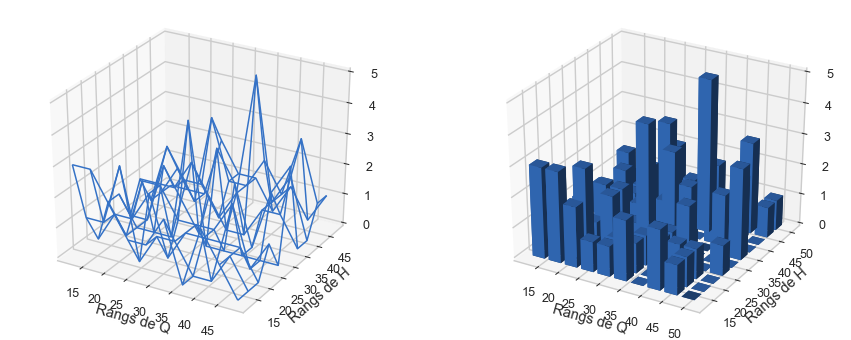

In [5]:
hide.plot_3d_ranks_study(zero_five_chr, ranks_rhythm, ranks_pattern)

Below is shown the distribution histogram of the F measure obtained with the oracle ranks.

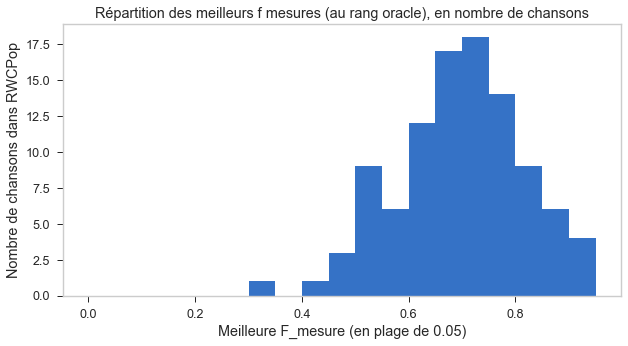

In [6]:
hide.plot_f_mes_histogram(zero_five_chr)

## Results when, in addition of the ranks, we also fit the $\lambda$ parameter

In addition of the previous results, we also tried to fit the $\lambda$ parameter for each rank couple (see previous Notebook, 4th one). They are shown below.

In [8]:
ranks_rhythm = [12,16,20,24,28,32,36,40,44,48]
ranks_pattern = [12,16,20,24,28,32,36,40,44,48]
range_param = [i/10 for i in range(0,20)]
zero_five, three = hide.compute_ranks_with_param_RWC(ranks_rhythm, ranks_pattern, range_param, annotations_type = "MIREX10", subdivision = 96, penalty_func = "modulo8")